 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Preprocessing-pipeline" data-toc-modified-id="Preprocessing-pipeline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing pipeline</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Merge-Aquaplanet-files" data-toc-modified-id="Merge-Aquaplanet-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merge Aquaplanet files</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Compute-differences-and-new-vars" data-toc-modified-id="Compute-differences-and-new-vars-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Compute differences and new vars</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Create-stacked-feature-and-target-dataset" data-toc-modified-id="Create-stacked-feature-and-target-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create stacked feature and target dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Reshape-variables" data-toc-modified-id="Reshape-variables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reshape variables</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Test-chunking" data-toc-modified-id="Test-chunking-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Test chunking</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Normalize-data" data-toc-modified-id="Normalize-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Normalize data</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Save-data" data-toc-modified-id="Save-data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Save data</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Shuffle-data-long-sample-dimension" data-toc-modified-id="Shuffle-data-long-sample-dimension-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Shuffle data long sample dimension</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Old-stuff-below" data-toc-modified-id="Old-stuff-below-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Old stuff below</a></span></li><li><span><a href="http://localhost:8888/notebooks/explore_aqua_files.ipynb#Preprocessed-files" data-toc-modified-id="Preprocessed-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessed files</a></span></li></ul></div>

This is simply a notebook to help me test stuff for the preprocessing script.

In [31]:
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import timeit
%matplotlib inline

## Preprocessing pipeline

In [2]:
feature_vars = ['TAP', 'QAP', 'SHFLX', 'LHFLX', 'SOLIN', 'dTdt_adiabatic', 'dQdt_adiabatic']
target_vars =  ['SPDT', 'SPDQ', 'QRL', 'QRS', 'PRECT', 'FLUT'] 

### Merge Aquaplanet files

In [3]:
data_dir = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01*'
%ls $data_dir

/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-01-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-02-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-03-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-04-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-05-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-06-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-07-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-08-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-09-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-10-00000.nc
/project/meteo/w2w/A6/S.Rasp/SP-CAM/Aqua

In [4]:
merged_ds = xr.open_mfdataset(data_dir, decode_times=False)

In [5]:
merged_ds

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 1488)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimension

In [6]:
merged_ds = merged_ds.isel(lev=np.arange(9, 30))

### Compute differences and new vars

In [7]:
dTdt_adiabatic = (merged_ds['TAP'].diff('time', n=1)) / (0.5 * 60 * 60) - merged_ds['TPHYSTND']
dQdt_adiabatic = (merged_ds['QAP'].diff('time', n=1)) / (0.5 * 60 * 60) - merged_ds['PHQ']

In [8]:
dTdt_adiabatic

<xarray.DataArray (time: 1487, lev: 21, lat: 64, lon: 128)>
dask.array<shape=(1487, 21, 64, 128), dtype=float32, chunksize=(47, 21, 64, 128)>
Coordinates:
  * time     (time) float64 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 121.5 143.0 168.2 197.9 232.8 273.9 322.2 379.1 ...

In [9]:
dTdt_adiabatic[:5, 0, 0, 0].values

array([ -1.01493360e-05,  -8.66869141e-06,  -8.13922270e-06,
        -8.11379414e-06,  -8.52306221e-06], dtype=float32)

In [10]:
((merged_ds['TAP'][1:6, 0, 0, 0].values - merged_ds['TAP'][:5, 0, 0, 0].values) / 
 (0.5 * 60 * 60) - merged_ds['TPHYSTND'][1:6, 0, 0, 0].values)

array([ -1.01493360e-05,  -8.66869141e-06,  -8.13922270e-06,
        -8.11379414e-06,  -8.52306221e-06], dtype=float32)

### Create stacked feature and target dataset 

In [11]:
# rename times
da_list = [dTdt_adiabatic, dQdt_adiabatic]
for var in feature_vars[:-2]:
    da_list.append(merged_ds[var][:-1])
for da in da_list:
    da.coords['time'] = np.arange(da.coords['time'].size)

In [12]:
ilev = 0
for da in da_list:
    if 'lev' in da.coords:
        da.coords['lev'] = np.arange(ilev, ilev+da.coords['lev'].size)
        ilev += da.coords['lev'].size
    else:
        da.expand_dims('lev')
        da.coords['lev'] = ilev
        ilev += 1

In [13]:
feature_da = xr.concat(da_list, dim='lev')

In [14]:
feature_da.name = 'features'

In [15]:
feature_da

<xarray.DataArray 'features' (time: 1487, lev: 87, lat: 64, lon: 128)>
dask.array<shape=(1487, 87, 64, 128), dtype=float32, chunksize=(47, 21, 64, 128)>
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [16]:
# Define conversion dict
L_V = 2.5e6   # Latent heat of vaporization is actually 2.26e6
C_P = 1e3 # Specific heat capacity of air at constant pressure
conversion_dict = {
    'SPDT': C_P,
    'SPDQ': L_V,
    'QRL': C_P,
    'QRS': C_P,
    'PRECT': 1e3*24*3600 * 1e-3,
    'FLUT': 1. * 1e-5,
}

In [17]:
da_list = []
for var in target_vars:
    da_list.append(merged_ds[var][1:] * conversion_dict[var])

In [18]:
ilev = 0
for da in da_list:
    if 'lev' in da.coords:
        da.coords['lev'] = np.arange(ilev, ilev+da.coords['lev'].size)
        ilev += da.coords['lev'].size
    else:
        da.expand_dims('lev')
        da.coords['lev'] = ilev
        ilev += 1

In [19]:
target_da = xr.concat(da_list, dim='lev')

In [20]:
target_da

<xarray.DataArray 'SPDT' (time: 1487, lev: 86, lat: 64, lon: 128)>
dask.array<shape=(1487, 86, 64, 128), dtype=float32, chunksize=(47, 21, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * time     (time) float64 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

### Reshape variables

In [21]:
feature_da = feature_da.stack(sample=('time', 'lat', 'lon'))

In [22]:
feature_da

<xarray.DataArray 'features' (lev: 87, sample: 12181504)>
dask.array<shape=(87, 12181504), dtype=float32, chunksize=(21, 385024)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) MultiIndex
  - time     (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lat      (sample) float64 -87.86 -87.86 -87.86 -87.86 -87.86 -87.86 ...
  - lon      (sample) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

In [23]:
target_da = target_da.stack(sample=('time', 'lat', 'lon'))

In [24]:
feature_da = feature_da.transpose('sample', 'lev')

In [25]:
target_da = target_da.transpose('sample', 'lev')

In [26]:
feature_da

<xarray.DataArray 'features' (sample: 12181504, lev: 87)>
dask.array<shape=(12181504, 87), dtype=float32, chunksize=(385024, 21)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) MultiIndex
  - time     (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lat      (sample) float64 -87.86 -87.86 -87.86 -87.86 -87.86 -87.86 ...
  - lon      (sample) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

### Test chunking

In [27]:
tmp_mean = feature_da.mean(axis=0)

In [32]:
t1 = timeit.default_timer()
tmp_mean.values
t2 = timeit.default_timer()
print('Time', t2-t1)

Time 113.14935766597046


In [48]:
rechunked = feature_da.chunk({'sample': 100000, 'lev': 87})

In [49]:
rechunked

<xarray.DataArray 'features' (sample: 12181504, lev: 87)>
dask.array<shape=(12181504, 87), dtype=float32, chunksize=(100000, 87)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...

In [50]:
tmp_mean = rechunked.mean(axis=0)
t1 = timeit.default_timer()
tmp_mean.values
t2 = timeit.default_timer()
print('Time', t2-t1)

Time 16.658672302030027


In [52]:
target_da.chunk({'sample': 100000, 'lev': 87})

<xarray.DataArray 'SPDT' (sample: 12181504, lev: 86)>
dask.array<shape=(12181504, 86), dtype=float32, chunksize=(100000, 86)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) MultiIndex
  - time     (sample) float64 0.02083 0.02083 0.02083 0.02083 0.02083 ...
  - lat      (sample) float64 -87.86 -87.86 -87.86 -87.86 -87.86 -87.86 ...
  - lon      (sample) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

### Normalize data

In [62]:
feature_da = (feature_da - feature_da.mean(axis=0)) / feature_da.std(axis=0)

In [63]:
feature_da[:5, 0].values

array([-0.04658319, -0.04703274, -0.04787715, -0.05999021, -0.06604938], dtype=float32)

### Save data

In [73]:
target_da.mean(axis=0).values

array([  0.00000000e+00,   0.00000000e+00,  -2.78707296e-02,
         1.97001975e-02,  -1.40102886e-04,  -2.90041906e-04,
        -1.40079344e-03,  -8.35143030e-04,   2.05248798e-04,
         6.49447393e-05,   1.40243719e-04,   3.12900491e-04,
         9.59602650e-04,   2.15967558e-03,   3.88757116e-03,
         5.87450806e-03,   8.01019091e-03,   9.81164351e-03,
         1.08052623e-02,   1.16248680e-02,   1.18329739e-02,
         1.14375884e-02,   1.69380773e-02,   2.83461697e-02,
         2.33789124e-02,   1.93057191e-02,   1.54855857e-02,
         1.36304982e-02,   1.38190733e-02,  -6.95045665e-02,
         0.00000000e+00,   0.00000000e+00,  -5.75145691e-07,
         3.32837658e-07,  -4.63667611e-08,  -9.48046406e-08,
        -5.12761922e-08,  -1.01488283e-07,  -2.01609532e-06,
        -1.14103786e-05,  -5.01209288e-05,  -1.84826553e-04,
        -5.58585860e-04,  -1.38411799e-03,  -2.72789248e-03,
        -4.26560175e-03,  -5.91911003e-03,  -7.10118096e-03,
        -7.90348742e-03,

In [78]:
feature_da = feature_da.reset_index('sample')

In [79]:
feature_da.to_netcdf('/local/S.Rasp/tmp/features_test.nc')

In [80]:
target_da = target_da.reset_index('sample')

In [81]:
target_da.to_netcdf('/local/S.Rasp/tmp/targets_test.nc')

In [83]:
import netCDF4 as nc

In [84]:
rg = nc.Dataset('/local/S.Rasp/tmp/SPCAM_outputs_train_prestack.nc')

In [87]:
rg.variables['targets'][0, :20]

array([ -6.43003029e-09,  -1.25751516e-08,   2.46928948e-08,
        -6.02209909e-08,   3.97957969e-08,  -1.05845707e-07,
         3.45189726e-08,  -9.45556894e-06,  -5.12513157e-04,
        -1.27191024e-05,  -3.65679426e-07,   3.04748539e-07,
        -3.50581217e-06,   3.72036743e-06,  -2.54532533e-05,
        -6.10721111e-03,  -1.38804447e-02,  -3.52747762e-03,
         6.70774316e-04,   6.06004987e-03], dtype=float32)

In [89]:
target_da[0, 9:20].values

array([ -6.43003029e-09,  -1.25751516e-08,   2.46928948e-08,
        -6.02209909e-08,   3.97957969e-08,  -1.05845707e-07,
         3.45189726e-08,  -9.45556894e-06,  -5.12513157e-04,
        -1.27191024e-05,  -3.65679426e-07], dtype=float32)

### Shuffle data long sample dimension

In [34]:
feature_da

<xarray.DataArray 'features' (sample: 12181504, lev: 87)>
dask.array<shape=(12181504, 87), dtype=float32, chunksize=(385024, 21)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) MultiIndex
  - time     (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lat      (sample) float64 -87.86 -87.86 -87.86 -87.86 -87.86 -87.86 ...
  - lon      (sample) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...

In [35]:
feature_da.coords['sample'].size

12181504

In [36]:
a = np.arange(feature_da.coords['sample'].size)

In [37]:
a

array([       0,        1,        2, ..., 12181501, 12181502, 12181503])

In [38]:
np.random.shuffle(a)

In [39]:
a

array([ 8716775,  7981464,  5599254, ...,  9313592,   552833, 11623479])

In [40]:
feature_da.coords['sample'] = a

In [41]:
feature_da

<xarray.DataArray 'features' (sample: 12181504, lev: 87)>
dask.array<shape=(12181504, 87), dtype=float32, chunksize=(385024, 21)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) int64 8716775 7981464 5599254 10036719 10702698 ...

In [43]:
feature_da = feature_da.sortby('sample')

In [44]:
feature_da[:5, :5].values

array([[ -3.31042502e-05,  -1.53572637e-05,   1.45695249e-05,
          3.71472779e-05,   5.57330277e-05],
       [ -1.01321302e-05,   2.92513159e-05,   1.37960078e-05,
          2.61373953e-05,   9.86647956e-06],
       [  8.84255496e-05,   1.95441258e-04,   1.38380303e-04,
         -9.93744979e-05,  -4.49311810e-05],
       [  2.13960493e-06,   3.82194230e-06,   1.22493611e-05,
          1.80067527e-05,   1.22076981e-05],
       [  2.91680790e-05,   1.31929246e-05,   8.69802807e-06,
          8.09933772e-06,  -1.55415364e-07]], dtype=float32)

In [46]:
feature_da = feature_da.chunk({'sample': 100000, 'lev': 87})

In [47]:
feature_da

<xarray.DataArray 'features' (sample: 12181504, lev: 87)>
dask.array<shape=(12181504, 87), dtype=float32, chunksize=(100000, 87)>
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * sample   (sample) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...

In [177]:
means = feature_shuf.mean(axis=0)

In [178]:
means.load()

<xarray.DataArray (lev: 123)>
array([ -5.644520e-09,   2.022521e-09,  -1.739070e-08,   3.254299e-08,
         1.191746e-09,  -1.320430e-08,  -2.629527e-09,  -1.020227e-08,
        -6.695835e-09,  -5.224432e-09,  -1.356209e-08,   2.225866e-09,
        -8.515797e-10,   1.104676e-08,   4.271854e-09,  -5.837991e-09,
        -7.996248e-09,   6.003936e-09,   4.970934e-09,   1.118455e-08,
        -2.705372e-09,   4.908744e-09,  -2.619990e-08,  -3.935005e-09,
         2.680273e-08,   1.134291e-08,   8.822793e-09,  -1.454503e-08,
        -1.178640e-08,  -9.862824e-09,  -1.286240e-08,   4.062009e-09,
         3.725900e-09,  -5.496159e-09,   1.000535e-09,   6.454335e-09,
         9.137509e-09,   3.000731e-08,   2.566287e-09,   1.079170e-08,
         4.053019e-09,   2.281224e-09,   1.511752e-08,  -1.302729e-08,
        -4.049307e-09,   5.463046e-09,   8.602464e-09,   2.109212e-09,
         8.379211e-09,  -1.709198e-08,   4.407056e-09,  -4.610692e-10,
         2.604211e-09,   6.788553e-09,   4.4164

In [179]:
means.rename('feature_mean')

<xarray.DataArray 'feature_mean' (lev: 123)>
array([ -5.644520e-09,   2.022521e-09,  -1.739070e-08,   3.254299e-08,
         1.191746e-09,  -1.320430e-08,  -2.629527e-09,  -1.020227e-08,
        -6.695835e-09,  -5.224432e-09,  -1.356209e-08,   2.225866e-09,
        -8.515797e-10,   1.104676e-08,   4.271854e-09,  -5.837991e-09,
        -7.996248e-09,   6.003936e-09,   4.970934e-09,   1.118455e-08,
        -2.705372e-09,   4.908744e-09,  -2.619990e-08,  -3.935005e-09,
         2.680273e-08,   1.134291e-08,   8.822793e-09,  -1.454503e-08,
        -1.178640e-08,  -9.862824e-09,  -1.286240e-08,   4.062009e-09,
         3.725900e-09,  -5.496159e-09,   1.000535e-09,   6.454335e-09,
         9.137509e-09,   3.000731e-08,   2.566287e-09,   1.079170e-08,
         4.053019e-09,   2.281224e-09,   1.511752e-08,  -1.302729e-08,
        -4.049307e-09,   5.463046e-09,   8.602464e-09,   2.109212e-09,
         8.379211e-09,  -1.709198e-08,   4.407056e-09,  -4.610692e-10,
         2.604211e-09,   6.78855

In [192]:
means.attrs['asdf'] ='asdf'

In [193]:
means

<xarray.DataArray (lev: 123)>
array([ -5.644520e-09,   2.022521e-09,  -1.739070e-08,   3.254299e-08,
         1.191746e-09,  -1.320430e-08,  -2.629527e-09,  -1.020227e-08,
        -6.695835e-09,  -5.224432e-09,  -1.356209e-08,   2.225866e-09,
        -8.515797e-10,   1.104676e-08,   4.271854e-09,  -5.837991e-09,
        -7.996248e-09,   6.003936e-09,   4.970934e-09,   1.118455e-08,
        -2.705372e-09,   4.908744e-09,  -2.619990e-08,  -3.935005e-09,
         2.680273e-08,   1.134291e-08,   8.822793e-09,  -1.454503e-08,
        -1.178640e-08,  -9.862824e-09,  -1.286240e-08,   4.062009e-09,
         3.725900e-09,  -5.496159e-09,   1.000535e-09,   6.454335e-09,
         9.137509e-09,   3.000731e-08,   2.566287e-09,   1.079170e-08,
         4.053019e-09,   2.281224e-09,   1.511752e-08,  -1.302729e-08,
        -4.049307e-09,   5.463046e-09,   8.602464e-09,   2.109212e-09,
         8.379211e-09,  -1.709198e-08,   4.407056e-09,  -4.610692e-10,
         2.604211e-09,   6.788553e-09,   4.4164

In [195]:
norm_ds = xr.Dataset({'1': means, '2': means})

In [196]:
norm_ds

<xarray.Dataset>
Dimensions:  (lev: 123)
Coordinates:
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    log      <U8 'test log'
Data variables:
    1        (lev) float32 -5.64452e-09 2.02252e-09 -1.73907e-08 3.2543e-08 ...
    2        (lev) float32 -5.64452e-09 2.02252e-09 -1.73907e-08 3.2543e-08 ...

In [182]:
means.to_netcdf('/local/S.Rasp/tmp/means_test.nc')

In [183]:
rg2 = nc.Dataset('/local/S.Rasp/tmp/means_test.nc')

In [184]:
rg2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    coordinates: log
    dimensions(sizes): lev(123)
    variables(dimensions): int64 lev(lev), <class 'str'> log(), float32 __xarray_dataarray_variable__(lev)
    groups: 

In [185]:
rg2.close()

In [36]:
TAP0 = all_files['TAP'][:-1]

In [38]:
TAP0.coords['time'] = np.arange(1487)

In [39]:
TAP0

<xarray.DataArray 'TAP' (time: 1487, lev: 30, lat: 64, lon: 128)>
dask.array<shape=(1487, 30, 64, 128), dtype=float32, chunksize=(48, 30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    units:      K
    long_name:  T after physics

In [48]:
TAP0.coords['lev'] = np.arange(0, 30)
dTdt_adiabatic.coords['lev'] = np.arange(30, 60)
TAP0, dTdt_adiabatic

(<xarray.DataArray 'TAP' (time: 1487, lev: 30, lat: 64, lon: 128)>
 dask.array<shape=(1487, 30, 64, 128), dtype=float32, chunksize=(48, 30, 64, 128)>
 Coordinates:
   * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
   * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
   * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
   * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
 Attributes:
     units:      K
     long_name:  T after physics,
 <xarray.DataArray 'TAP' (time: 1487, lev: 30, lat: 64, lon: 128)>
 dask.array<shape=(1487, 30, 64, 128), dtype=float32, chunksize=(47, 30, 64, 128)>
 Coordinates:
   * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
   * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
   * lev      (lev) int64 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 ...
   * time     (time) int64 0 1 2 3 4 5 6 7 8 9 1

In [51]:
a = xr.concat([TAP0, dTdt_adiabatic], dim='lev')

In [52]:
a

<xarray.DataArray 'TAP' (time: 1487, lev: 60, lat: 64, lon: 128)>
dask.array<shape=(1487, 60, 64, 128), dtype=float32, chunksize=(47, 30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [55]:
a[0, 30, 0, 0].values

array(-8.917914783523884e-06, dtype=float32)

In [57]:
dTdt_adiabatic[0, 0, 0, 0].values

array(-8.917914783523884e-06, dtype=float32)

In [49]:
new_ds = xr.Dataset({'TAP0': TAP0,
                     'dTdt_adiabatic': dTdt_adiabatic})

In [50]:
new_ds

<xarray.Dataset>
Dimensions:         (lat: 64, lev: 60, lon: 128, time: 1487)
Coordinates:
  * lev             (lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * lat             (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon             (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * time            (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    TAP0            (time, lev, lat, lon) float64 dask.array<shape=(1487, 60, 64, 128), chunksize=(48, 30, 64, 128)>
    dTdt_adiabatic  (time, lev, lat, lon) float64 dask.array<shape=(1487, 60, 64, 128), chunksize=(47, 30, 64, 128)>

In [45]:
new_ds['TAP0'].coords['lev'] = np.arange(30)
new_ds['dTdt_adiabatic'].coords['lev'] = np.arange(30, 60)

In [46]:
new_ds

<xarray.Dataset>
Dimensions:         (lat: 64, lev: 30, lon: 128, time: 1487)
Coordinates:
  * lat             (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon             (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * lev             (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * time            (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    TAP0            (time, lev, lat, lon) float32 dask.array<shape=(1487, 30, 64, 128), chunksize=(48, 30, 64, 128)>
    dTdt_adiabatic  (time, lev, lat, lon) float32 dask.array<shape=(1487, 30, 64, 128), chunksize=(47, 30, 64, 128)>

## Old stuff below

In [4]:
rg = nc.Dataset(data_dir + 'AndKua_aqua_SPCAM3.0.cam2.h1.0000-01-01-00000.nc')
rg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CAM
    case: AndKua_aqua_SPCAM3.0
    title: 
    logname: tg802402
    host: c532-003.stamped
    Version: $Name:  $
    revision_Id: $Id: history.F90,v 1.26.2.38 2003/12/15 18:52:35 hender Exp $
    dimensions(sizes): lat(64), lon(128), lev(30), ilev(31), isccp_prs(7), isccp_tau(7), isccp_prstau(49), time(48), tbnd(2), chars(8), crm_x(32), crm_y(1), crm_z(28)
    variables(dimensions): float64 P0(), float64 lat(lat), float64 lon(lon), float64 crm_x(crm_x), float64 crm_y(crm_y), float64 crm_z(crm_z), float64 lev(lev), float64 ilev(ilev), float64 isccp_prs(isccp_prs), float64 isccp_tau(isccp_ta), float64 isccp_prstau(isccp_prsta), float64 time(time), float64 time_bnds(time,tbnd), |S1 date_written(time,chars), |S1 time_written(time,chars), int32 ntrm(), int32 ntrn(), int32 ntrk(), int32 ndbase(), int32 nsbase(), int32 nbdate(), int32 nbsec(), int32 mdt(),

In [5]:
rg.variables['TAP'].long_name

'T after physics'

In [9]:
for vn, v in rg.variables.items():
    print(vn)
    try:
        print(v.long_name)
    except:
        print('No long name.')

P0
reference pressure
lat
latitude
lon
longitude
crm_x
crm horiz. distance in x
crm_y
crm horiz. distance in y
crm_z
crm nominal pressure levels
lev
hybrid level at midpoints (1000*(A+B))
ilev
hybrid level at interfaces (1000*(A+B))
isccp_prs
Mean ISCCP pressure
isccp_tau
Mean ISCCP optical depth
isccp_prstau
Mean pressure (mb).mean optical depth (unitless)/1000
time
time
time_bnds
time interval endpoints
date_written
No long name.
time_written
No long name.
ntrm
spectral truncation parameter M
ntrn
spectral truncation parameter N
ntrk
spectral truncation parameter K
ndbase
base day
nsbase
seconds of base day
nbdate
base date (YYYYMMDD)
nbsec
seconds of base date
mdt
timestep
nlon
number of longitudes
wnummax
cutoff Fourier wavenumber
hyai
hybrid A coefficient at layer interfaces
hybi
hybrid B coefficient at layer interfaces
hyam
hybrid A coefficient at layer midpoints
hybm
hybrid B coefficient at layer midpoints
gw
gauss weights
ndcur
current day (from base day)
nscur
current seconds 

In [70]:
rg.dimensions['lev'].size

30

In [10]:
QRS = rg.variables['QRS'][:]

In [11]:
QRS.shape

(48, 30, 64, 128)

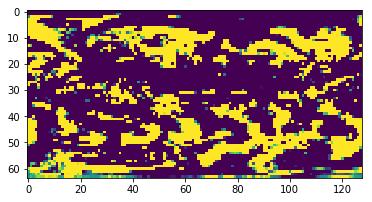

In [21]:
plt.imshow(rg.variables['CLDTOT'][1, :, :])

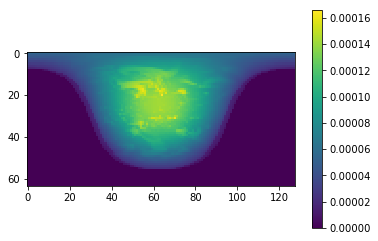

In [25]:
plt.imshow(QRS[1, 0, :, :])
plt.colorbar()

In [57]:
rg.variables['PHQ']

<class 'netCDF4._netCDF4.Variable'>
float32 PHQ(time, lev, lat, lon)
    units: kg/kg/s
    long_name: Specific humidity physics tendency
    cell_method: time: mean
unlimited dimensions: time
current shape = (48, 30, 64, 128)
filling off

In [55]:
time = rg.variables['TAP']
time.shape

(48, 30, 64, 128)

In [5]:
time[:]

array([ 0.        ,  0.02083333,  0.04166667,  0.0625    ,  0.08333333,
        0.10416667,  0.125     ,  0.14583333,  0.16666667,  0.1875    ,
        0.20833333,  0.22916667,  0.25      ,  0.27083333,  0.29166667,
        0.3125    ,  0.33333333,  0.35416667,  0.375     ,  0.39583333,
        0.41666667,  0.4375    ,  0.45833333,  0.47916667,  0.5       ,
        0.52083333,  0.54166667,  0.5625    ,  0.58333333,  0.60416667,
        0.625     ,  0.64583333,  0.66666667,  0.6875    ,  0.70833333,
        0.72916667,  0.75      ,  0.77083333,  0.79166667,  0.8125    ,
        0.83333333,  0.85416667,  0.875     ,  0.89583333,  0.91666667,
        0.9375    ,  0.95833333,  0.97916667])

In [6]:
lats = rg.variables['lat'][:]

In [34]:
lats.shape

(64,)

In [46]:
e = lats.reshape((1, 64, 1))
e.shape

(1, 64, 1)

In [47]:
e = np.repeat(e, 5, axis=0)

In [48]:
e.shape

(5, 64, 1)

In [49]:
e = np.repeat(e, 10, axis=2)
e.shape

(5, 64, 10)

In [52]:
e[0, 0, :]

array([-87.86379884, -87.86379884, -87.86379884, -87.86379884,
       -87.86379884, -87.86379884, -87.86379884, -87.86379884,
       -87.86379884, -87.86379884])

In [37]:
c = np.repeat(lats, 5 * 10)
c.shape

(3200,)

In [43]:
d = c.reshape((5, 64, 10))

In [44]:
d.shape

(5, 64, 10)

In [45]:
d[0,:,0]

array([-87.86379884, -87.86379884, -87.86379884, -87.86379884,
       -87.86379884, -85.09652699, -85.09652699, -85.09652699,
       -85.09652699, -85.09652699, -82.31291295, -82.31291295,
       -82.31291295, -82.31291295, -82.31291295, -79.52560657,
       -79.52560657, -79.52560657, -79.52560657, -79.52560657,
       -76.73689968, -76.73689968, -76.73689968, -76.73689968,
       -76.73689968, -73.94751515, -73.94751515, -73.94751515,
       -73.94751515, -73.94751515, -71.15775201, -71.15775201,
       -71.15775201, -71.15775201, -71.15775201, -68.36775611,
       -68.36775611, -68.36775611, -68.36775611, -68.36775611,
       -65.57760701, -65.57760701, -65.57760701, -65.57760701,
       -65.57760701, -62.7873518 , -62.7873518 , -62.7873518 ,
       -62.7873518 , -62.7873518 , -59.99702011, -59.99702011,
       -59.99702011, -59.99702011, -59.99702011, -57.20663153,
       -57.20663153, -57.20663153, -57.20663153, -57.20663153,
       -54.41619953, -54.41619953, -54.41619953, -54.41

In [7]:
cond = (lats > -90) & (lats < 90)
cond

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [8]:
import numpy as np

In [9]:
lat_idxs = np.where((lats > -90) & (lats < 90))

In [10]:
lat_idxs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),)

In [11]:
tap = rg.variables['TAP']

In [29]:
'LAT' in rg.variables.keys()

False

In [12]:
tap.dimensions

('time', 'lev', 'lat', 'lon')

In [15]:
tap[:][:, :, lat_idxs, :]

array([[[[[ 246.80204773,  246.79644775,  246.79115295, ...,  246.81835938,
            246.81265259,  246.80718994],
          [ 246.8709259 ,  246.86141968,  246.85159302, ...,  246.89523315,
            246.88807678,  246.87986755],
          [ 246.9909668 ,  246.96942139,  246.94703674, ...,  247.04100037,
            247.02748108,  247.01074219],
          ..., 
          [ 167.77011108,  167.75193787,  167.73597717, ...,  167.84043884,
            167.81425476,  167.79090881],
          [ 167.94969177,  167.94126892,  167.93696594, ...,  167.99821472,
            167.97850037,  167.96220398],
          [ 168.68197632,  168.68193054,  168.68389893, ...,  168.69444275,
            168.6882782 ,  168.68406677]]],


        [[[ 233.19773865,  233.19470215,  233.19039917, ...,  233.19779968,
            233.19889832,  233.1988678 ],
          [ 233.290802  ,  233.29478455,  233.29711914, ...,  233.27140808,
            233.27894592,  233.28540039],
          [ 233.34965515,  233.37680

In [16]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [24]:
b = np.arange(0, 0+19)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [25]:
a[b]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [9]:
nc.Dataset(data_dir + 'AndKua_aqua_SPCAM3.0.cam2.h1.0001-01-01-00000.nc').variables['time'][:]

array([ 365.        ,  365.02083333,  365.04166667,  365.0625    ,
        365.08333333,  365.10416667,  365.125     ,  365.14583333,
        365.16666667,  365.1875    ,  365.20833333,  365.22916667,
        365.25      ,  365.27083333,  365.29166667,  365.3125    ,
        365.33333333,  365.35416667,  365.375     ,  365.39583333,
        365.41666667,  365.4375    ,  365.45833333,  365.47916667,
        365.5       ,  365.52083333,  365.54166667,  365.5625    ,
        365.58333333,  365.60416667,  365.625     ,  365.64583333,
        365.66666667,  365.6875    ,  365.70833333,  365.72916667,
        365.75      ,  365.77083333,  365.79166667,  365.8125    ,
        365.83333333,  365.85416667,  365.875     ,  365.89583333,
        365.91666667,  365.9375    ,  365.95833333,  365.97916667])

In [10]:
nc.Dataset('/Volumes/STICK/data/SPCAM/sample/SPCAM_outputs.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(100000), z(21)
    variables(dimensions): float64 LAT(t), float64 PS(t), float64 SHFLX(t), float64 LHFLX(t), float64 OMEGA(z,t), float64 QAP(z,t), float64 TAP(z,t), float64 QRL(z,t), float64 QRS(z,t), float64 UBSP(z,t), float64 VBSP(z,t), float64 SPQC(z,t), float64 SPQG(z,t), float64 SPQI(z,t), float64 SPQR(z,t), float64 SPMC(z,t), float64 SPMCDN(z,t), float64 SPMCUDN(z,t), float64 SPMCUP(z,t), float64 SPMCUUP(z,t), float64 TPHYSTND(z,t), float64 PHQ(z,t), float64 SPDT(z,t), float64 SPDQ(z,t), float64 SPDQC(z,t), float64 SPDQI(z,t), float64 dTdt_adiabatic(z,t), float64 dQdt_adiabatic(z,t), float64 GRAD_UQ_H(z,t)
    groups: 

In [13]:
64 * 128 * 48

393216

In [16]:
4.5e6 / (64 * 128 * 48)

11.444091796875

## Preprocessed files

In [3]:
data_dir = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/preprocessed_data/'

In [4]:
old_rg = nc.Dataset(data_dir + 'SPCAM_outputs.nc')

In [5]:
new_rg = nc.Dataset(data_dir + 'SPCAM_outputs_flat.nc')

In [6]:
old_rg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): t(4620288), z(21)
    variables(dimensions): float64 LAT(t), float64 PS(t), float64 SHFLX(t), float64 LHFLX(t), float64 OMEGA(z,t), float64 QAP(z,t), float64 TAP(z,t), float64 QRL(z,t), float64 QRS(z,t), float64 UBSP(z,t), float64 VBSP(z,t), float64 SPQC(z,t), float64 SPQG(z,t), float64 SPQI(z,t), float64 SPQR(z,t), float64 SPMC(z,t), float64 SPMCDN(z,t), float64 SPMCUDN(z,t), float64 SPMCUP(z,t), float64 SPMCUUP(z,t), float64 TPHYSTND(z,t), float64 PHQ(z,t), float64 SPDT(z,t), float64 SPDQ(z,t), float64 SPDQC(z,t), float64 SPDQI(z,t), float64 dTdt_adiabatic(z,t), float64 dQdt_adiabatic(z,t), float64 GRAD_UQ_H(z,t)
    groups: 

In [7]:
new_rg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    log: 
    Time: 2017-10-30T14:44:09

    Executed command:

    python preprocess_aqua.py --in_dir /project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/ --out_dir /project/meteo/w2w/A6/S.Rasp/SP-CAM/preprocessed_data/ --flatten --verbose

    In directory: /home/s/S.Rasp/repositories/CBRAIN/data_processing

    Git hash: ef6ddb9cc3b203f576c86d9bfa8bb8a5d5e162dc

        
    dimensions(sizes): lev(21), sample(5005312)
    variables(dimensions): float32 TAP(lev,sample), float32 QAP(lev,sample), float32 OMEGA(lev,sample), float32 SHFLX(sample), float32 LHFLX(sample), float32 LAT(sample), float32 dTdt_adiabatic(lev,sample), float32 dQdt_adiabatic(lev,sample), float32 QRL(lev,sample), float32 QRS(lev,sample), float32 SPDT(lev,sample), float32 SPDQ(lev,sample)
    groups: 

In [11]:
old_rg.variables['TAP'][:, 0]

array([ 227.7940979 ,  226.84568787,  225.15045166,  222.55490112,
        219.93135071,  216.37420654,  216.28483582,  220.89137268,
        228.23724365,  237.4683075 ,  246.025177  ,  252.92204285,
        258.5763855 ,  262.90176392,  264.7696228 ,  266.39907837,
        268.07492065,  269.69836426,  271.17877197,  272.48190308,
        273.74246216])

In [12]:
new_rg.variables['TAP'][:, 0]

array([ 227.7940979 ,  226.84568787,  225.15045166,  222.55490112,
        219.93135071,  216.37420654,  216.28483582,  220.89137268,
        228.23724365,  237.4683075 ,  246.025177  ,  252.92204285,
        258.5763855 ,  262.90176392,  264.7696228 ,  266.39907837,
        268.07492065,  269.69836426,  271.17877197,  272.48190308,
        273.74246216], dtype=float32)

Nice!

In [13]:
det_rg = nc.Dataset(data_dir + 'SPCAM_outputs_detailed.nc')

In [14]:
det_rg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    log: 
    Time: 2017-10-30T14:41:24

    Executed command:

    python preprocess_aqua.py --in_dir /project/meteo/w2w/A6/S.Rasp/SP-CAM/Aquaplanet/ --out_dir /project/meteo/w2w/A6/S.Rasp/SP-CAM/preprocessed_data/ --flatten --verbose

    In directory: /home/s/S.Rasp/repositories/CBRAIN/data_processing

    Git hash: ef6ddb9cc3b203f576c86d9bfa8bb8a5d5e162dc

        
    dimensions(sizes): date(13), time(47), lev(21), lat(64), lon(128)
    variables(dimensions): float32 date(date), float32 time(time), float32 lev(lev), float32 lat(lat), float32 lon(lon), float32 TAP(date,time,lev,lat,lon), float32 QAP(date,time,lev,lat,lon), float32 OMEGA(date,time,lev,lat,lon), float32 SHFLX(date,time,lat,lon), float32 LHFLX(date,time,lat,lon), float32 LAT(date,time,lat,lon), float32 dTdt_adiabatic(date,time,lev,lat,lon), float32 dQdt_adiabatic(date,time,lev,lat,lon), float32 QRL(date,time,lev,lat,lon), float32 QRS

In [15]:
det_rg.variables['TAP'][0, 0, :, 0, 0]

array([ 227.7940979 ,  226.84568787,  225.15045166,  222.55490112,
        219.93135071,  216.37420654,  216.28483582,  220.89137268,
        228.23724365,  237.4683075 ,  246.025177  ,  252.92204285,
        258.5763855 ,  262.90176392,  264.7696228 ,  266.39907837,
        268.07492065,  269.69836426,  271.17877197,  272.48190308,
        273.74246216], dtype=float32)

In [16]:
mean_rg = nc.Dataset(data_dir + 'SPCAM_mean_detailed.nc')

In [17]:
mean_rg.variables['TAP'][:]

array([ 208.00901794,  209.65861511,  211.52218628,  213.92713928,
        217.68138123,  223.05789185,  229.81231689,  237.41885376,
        245.45547485,  253.59277344,  260.89660645,  266.70016479,
        270.84454346,  273.38983154,  275.33877563,  276.81051636,
        278.33215332,  279.8505249 ,  281.33499146,  282.72061157,
        283.98620605], dtype=float32)

In [18]:
t = mean_rg.variables['TAP']

In [19]:
t.dtype

dtype('float32')

In [215]:
import timeit
t1 = timeit.default_timer()
t2 = timeit.default_timer()
print('Total time:', t2 - t1, 's')

Total time: 6.809702608734369e-05 s
